<a href="https://colab.research.google.com/github/psaleksandrova/hseprog2018/blob/master/kontr2_var2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Контрольная номер 2. Вариант 2


https://archive.ics.uci.edu/ml/datasets/Adult - датасет с социодемографической информацией о взрослых жителях некоторых стран.


## Задание 1 (1 балл)

Загрузите выборку (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) в dataframe (без признака `fnlwgt`).

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases' +
                 '/adult/adult.data', 
                 names=["age", "workclass", "fnlwgt", "education", 
                        "education-num", "marital-status", "occupation",
                        "relationship", "race", "sex", "capital-gain", 
                        "capital-loss", "hours-per-week", "native-country",
                        "income"], 
                 usecols=["age", "workclass", "education", "education-num", 
                          "marital-status", "occupation", "relationship", 
                          "race", "sex", "capital-gain", "capital-loss", 
                          "hours-per-week", "native-country", "income"])

In [88]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Задание 2 (2 балла)

Используя pandas и датасет, ответьте на вопросы:

1. У какого workclass доход чаще всего превышает 50K (1 балл)?
2. Постройте график зависимости доли людей с доходом больше 50K от возраста (1 балл).

In [0]:
df_wc = pd.DataFrame()

In [0]:
df_wc['all'] = df.groupby(['workclass']).age.count()
df_wc['>50К'] = df[df.income == ' >50K'].groupby(['workclass']).age.count()

In [0]:
df_wc = df_wc.fillna(0)

In [0]:
df_wc['share'] = df_wc['>50К'] / df_wc['all']

In [140]:
df_wc

,all,>50К,share
workclass,,,
?,1836,191.0,0.104031
Federal-gov,960,371.0,0.386458
Local-gov,2093,617.0,0.294792
Never-worked,7,0.0,0.000000
Private,22696,4963.0,0.218673
Self-emp-inc,1116,622.0,0.557348
Self-emp-not-inc,2541,724.0,0.284927
State-gov,1298,353.0,0.271957
Without-pay,14,0.0,0.000000


Получается, что чаще всего доход превышает 50К у группы Self-emp-inc.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
df_age = pd.DataFrame()

In [0]:
df_age['all'] = df.groupby(['age']).workclass.count()
df_age['>50К'] = df[df.income == ' >50K'].groupby(['age']).workclass.count()

In [0]:
df_age = df_age.fillna(0)

In [0]:
df_age['share'] = df_age['>50К'] / df_age['all']

In [151]:
df_age

,all,>50К,share
age,,,
17,395,0.0,0.000000
18,550,0.0,0.000000
19,712,2.0,0.002809
20,753,0.0,0.000000
21,720,3.0,0.004167
...,...,...,...
85,3,0.0,0.000000
86,1,0.0,0.000000
87,1,0.0,0.000000


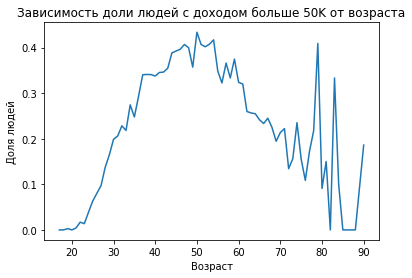

In [154]:
plt.plot(df_age.share)
plt.xlabel('Возраст')
plt.ylabel('Доля людей')
plt.title('Зависимость доли людей с доходом больше 50K от возраста')
plt.show()

## Задание 3  (1 балл)

Преобразуйте категориальные признаки в бинарные.

Разделите выборку на тренировочную и тестовую (80%/20%) с сохранением баланса классов.


In [0]:
df = pd.get_dummies(df, drop_first=True)

In [156]:
df

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,...,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
target = df['income_ >50K']

In [0]:
del df['income_ >50K']

In [0]:
RANDOM_STATE = 20
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2,
                                                    random_state=RANDOM_STATE,
                                                    stratify=target)

## Задание 4 (3 балла)

Используя обучающую выборку, подберите модель `sklearn.ensemble.RandomForestClassifier`. Использйте стратегию k-fold и перебор параметров (например, поэксперементируйте с числом деревьев и максимальной глубиной дерева) через gridsearchcv.

Если модели слишком долго обучаются, допускается уменьшить количество объектов в обучающей выборке до 5000-10000 с сохранением баланса классов (если качество модели станет хуже, не страшно), изменив долю тренировочной выборки в задании 3.

Выведите 3 самых важных признака, а также precision и recall на тестовой выборке.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [177]:
skf = StratifiedKFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': list(range(4, 12))
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=skf)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [178]:
CV_rfc.best_params_

{'max_depth': 11, 'n_estimators': 100}

In [0]:
rfc = RandomForestClassifier(max_depth=11, n_estimators=100)
for (train, test), i in zip(skf.split(X_train, y_train), range(5)):
    rfc.fit(X_train.iloc[train], y_train.iloc[train])
y_pred = rfc.predict(X_test)

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4945
           1       0.81      0.55      0.66      1568

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.86      0.86      0.85      6513



In [190]:
feature_importances = rfc.feature_importances_

array([7.79846045e-02, 1.11591023e-01, 1.53946855e-01, 3.37623510e-02,
       4.89272332e-02, 2.23989817e-03, 1.95172644e-03, 0.00000000e+00,
       3.92210732e-03, 5.35204863e-03, 4.61910061e-03, 1.56827237e-03,
       1.29273098e-05, 2.11085695e-03, 3.27957715e-04, 2.09050833e-04,
       4.99038094e-04, 2.35051422e-03, 6.85101251e-04, 1.62880126e-03,
       1.37563950e-03, 2.04549735e-02, 5.78061625e-03, 9.23190416e-03,
       1.18214938e-02, 1.65782894e-05, 1.12528120e-02, 4.84140859e-03,
       3.31534671e-04, 1.96511556e-01, 8.93708478e-04, 5.77646851e-02,
       2.33179958e-03, 1.87705488e-03, 2.56675293e-03, 0.00000000e+00,
       1.70014582e-03, 2.95243472e-02, 2.82810825e-03, 3.03602319e-03,
       1.20874560e-03, 9.83614594e-03, 5.22763616e-05, 2.76780187e-02,
       6.55163176e-04, 2.24939297e-03, 2.20885947e-03, 1.56101292e-03,
       3.39391251e-02, 2.32199605e-03, 2.52785997e-02, 1.47406376e-02,
       1.18145769e-02, 1.48394026e-03, 2.32534931e-03, 3.42420863e-04,
      

## Задание 5 (1.5 балла)

На графике востановленная моделью зависисмость y от x. Что вы можете сказать про качество обучения модели? Насколько качественно модель будет работать на тестовых данных? Почему вы так думаете?
![](https://www.dropbox.com/s/xosy4f670kjrx1f/1_2.png?dl=1)

Можно заметить, что восстановленная кривая уж слишком хорошо предсказывает примеры из обучающей выборки, из чего можно сделать, что мы имеем дело с переобучением. Это значит, что при работе с тестовой выборкой велика вероятность плохих результатов, так как модель не научилась предсказывать данные, а, грубо говоря, всего лишь запомнила все объекты для обучающей выборки.

## Задание 6 (1.5 балла)
Вы обучили вот такую модель. Качество на тестовой выборке плохое. Как вы думаете почему? Какой параметр стоило бы поменять в первую очередь, чтобы это исправить? На что он влияет?
![img](https://www.dropbox.com/s/utep6t4g85eo7am/3_2.png?dl=1)

Мне кажется, что проблема в выбранном learning_rate, так как при размере шага, равный 1, мы будем постоянно перепрыгивать, что приведет к случайному блужданию.